# Import statements

In [43]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
news = pd.read_csv('newdatasetfinal.csv')
news.head()

,title,NewCategory
0,Bitcoin is down 60 percent this year. Here's w...,Business & Finance
1,6 health problems marijuana could treat better...,Crime
2,9 charts that explain the history of global we...,Business & Finance
3,Remember when legal marijuana was going to sen...,Crime
4,Obamacare succeeded for one simple reason: it'...,Technology & Health


In [45]:
news['NewCategory'].unique() # unique category labels

array(['Business & Finance', 'Crime', 'Technology & Health', 'Politics',
       'Entertainment'], dtype=object)

(-1.1212660257337572,
 1.1010126678920837,
 -1.1144114010243673,
 1.108230423779538)

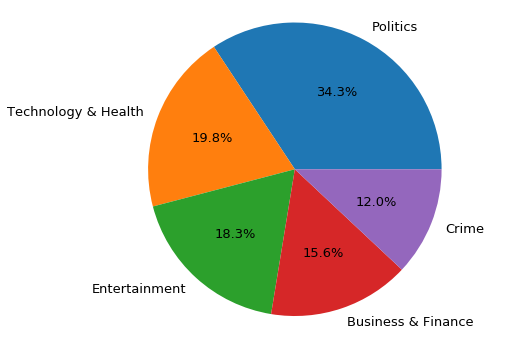

In [46]:
news.NewCategory.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [47]:
news['title'] = news['title'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case
news['NewCategory'] = news['NewCategory'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case


# Vectorization

In [48]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['title'])

y = news['NewCategory']

# Spiltting the Data into Training and Testing

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 30% split

# Training Decision Tree Classifier

In [52]:

# fit and score the bayesian classifier
mnb = MultinomialNB(alpha=0.96)
mnb.fit(X_train, y_train)

# mnb.score(X_test, y_test)

MultinomialNB(alpha=0.96, class_prior=None, fit_prior=True)

In [53]:
y_pred = mnb.predict(X_test)

In [54]:
#Finding the accuracy of Model
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model:", acc*100)

Accuracy of Multinomial Naive Bayes model: 80.55555555555556


# Hyperparameter Tuning

In [55]:
# fit and score the bayesian classifier
mnb = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [56]:
y_pred = mnb.predict(X_test)

# Performance Metric

1. Accuracy

In [57]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model:", acc*100)

Accuracy of Multinomial Naive Bayes model: 80.87301587301587


2. F1 Score

In [58]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.82634731, 0.66549605, 0.8377193 , 0.83507422, 0.80263158])

3. Confusion Matrix

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 621,   17,   15,   80,   48],
       [   7,  379,   31,  120,   18],
       [  24,   42,  764,   79,   41],
       [  28,  113,   18, 1519,   54],
       [  42,   33,   46,  108,  793]], dtype=int64)

4. Precision-Recall

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

 business  finance       0.86      0.80      0.83       781
             crime       0.65      0.68      0.67       555
     entertainment       0.87      0.80      0.84       950
          politics       0.80      0.88      0.84      1732
technology  health       0.83      0.78      0.80      1022

         micro avg       0.81      0.81      0.81      5040
         macro avg       0.80      0.79      0.79      5040
      weighted avg       0.81      0.81      0.81      5040



References
https://scikit-learn.org/stable/modules/naive_bayes.html
https://towardsdatascience.com/multinomial-naive-bayes-classifier-for-text-analysis-python-8dd6825ece67
http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.naive_bayes.MultinomialNB.html